In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [9]:
X, y = datasets.make_hastie_10_2(n_samples=20000, random_state = 1)

In [10]:
df = pd.DataFrame(data=X, columns=['X'+str(i) for i in range(1,11)])
df['y']=pd.Series(y)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,-2.301539,1.744812,-0.761207,0.319039,-0.249370,1.0
1,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-1.099891,-0.172428,-0.877858,0.042214,0.582815,1.0
2,-1.100619,1.144724,0.901591,0.502494,0.900856,-0.683728,-0.122890,-0.935769,-0.267888,0.530355,-1.0
3,-0.691661,-0.396754,-0.687173,-0.845206,-0.671246,-0.012665,-1.117310,0.234416,1.659802,0.742044,-1.0
4,-0.191836,-0.887629,-0.747158,1.692455,0.050808,-0.636996,0.190915,2.100255,0.120159,0.617203,1.0


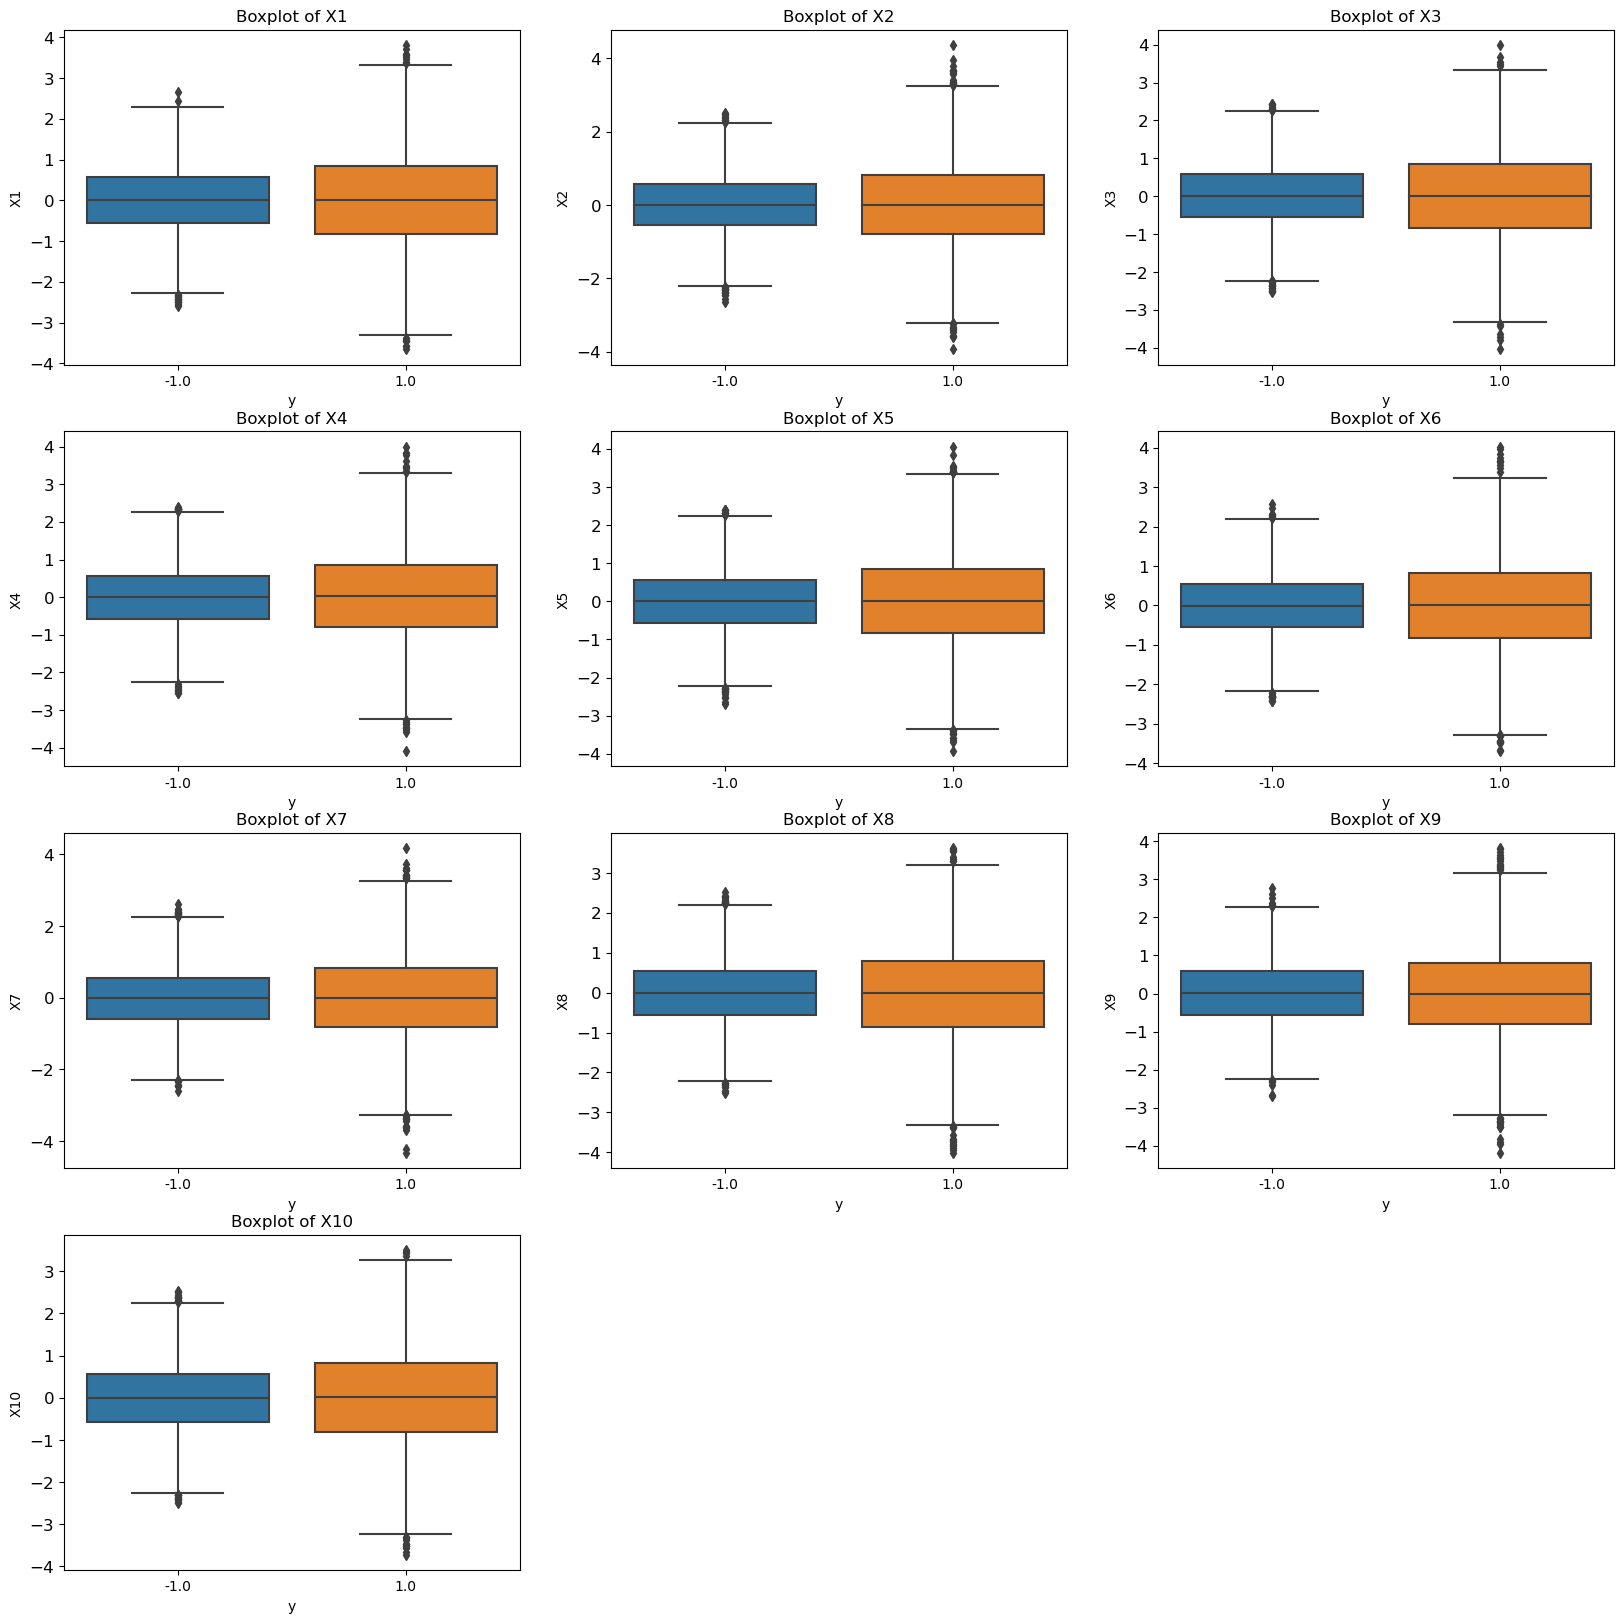

In [13]:
i=1
plt.figure(figsize=(20,20))
for c in df.columns[:-1]:
    plt.subplot(4,3,i)
    plt.title(f"Boxplot of {c}")
    plt.yticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['y'])
    i+=1
plt.show()

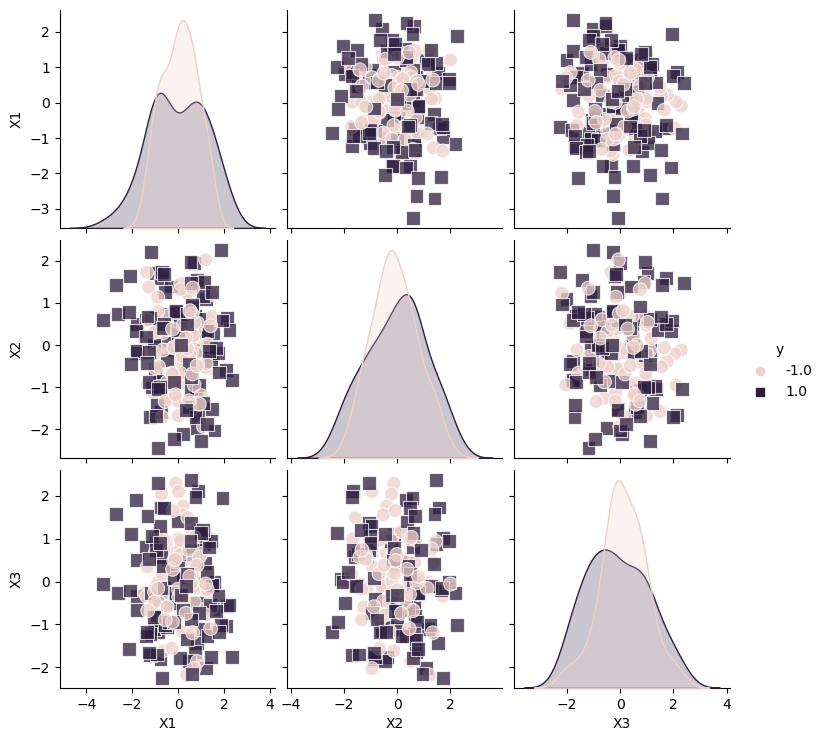

In [17]:
df_sample=df.sample(frac=0.01)
g=sns.pairplot(df_sample, vars=['X1','X2','X3'],
              hue="y",markers=["o","s"],
              diag_kind="kde",diag_kws=dict(shade=True),plot_kws=dict(s=100,alpha=0.75))

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop('y', axis=1)
y = df['y']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50)

In [29]:
print("Shape of validation set:", X_val.shape)
print("Shape of test set:", X_test.shape)
print("Shape of training set:", X_train.shape)

Shape of validation set: (3000, 10)
Shape of test set: (3000, 10)
Shape of training set: (14000, 10)


* Target( y ) : 예측 하려는 목표 ( ex. 당뇨 여부를 참과 거짓으로 분류하는 문제는 당뇨 여부 칼럼이 target )
> target은 label, class 이라고도 함
----------------
* Feature( X ) : Target을 제외한 나머지 칼럼 ( 데이터 속성 )
----------------
* for 문 안에 plt.subplot(4,3,i) , i+=1 : 자리 지정해주는 거
----------------
* df.sample(frac=0.2) : 20퍼센트 샘플 추출
----------------
* pairplot : 관계 그래프 ( 각 데이터 열의 조합에 대한 산점도, 대각선 영역에는 해당 데이터의 히스토그램 )
* 히트맵 그래프 버전
> - hue = "y" : y를 기준으로 나누기
> - markers = [o,s] / s=square
> - vars = ['X1','X2','X3'] : 보고 싶은 칼럼 제한  /  X1,X2,X3만 보겠다.
> - diag_kind = "kde" : 대각선 영역은 kde 그래프로 설정 ( kde plot(커널밀도추정그래프) 데이터 분포를 부드럽고 연속적인 곡선으로 표현 , 히스토그램이 이산적이라면 kde그래프는 연속적
> - plot_kws = dict(s=100, alpha = 0.75) : 비대각선 그래프 s는 사이즈, alpha는 투명도
* validation set(검증 데이터) : 모델 성능을 평가하기 위해 training 이후 만들어진 모형이 잘 예측하는지 평가하는 세트
* training 과정에서 val_set은 관여하지 않음.
> - 장점 1. 모델이 test data에 대해 좋은 성능을 내는지 확인가능
> - 장점 2. 모델의 성능 높일 수 있음
> - 예시) training accuracy는 높고 validation accuracy는 낮다면 데이터가 training set에 오버피팅이 일어났을 가능성 생김
